In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from millify import millify


In [48]:
file_path = r'C:\Users\Sujal Karmakar\Desktop\Desktop\Data Analyst\Python\python_data_analytics_project\DataAnalysis practice with my Instagram scraped dataset\ig_profile_data\all_usernames_profile_data_copy.xlsx'

df = pd.read_excel(file_path)

# filtering valid labels only 

# professional label should not be nan
df = df[df["Professional Label"].notna()] 

label_counts = df["Professional Label"].value_counts()

# the count of label should atleast be 5
valid_labels =  label_counts[label_counts >= 5].index 

df = df[df["Professional Label"].isin(valid_labels)]

# fiiling 0 to each nan values
df["Followers Count"] = df["Followers Count"].fillna(0)

df["Following Count"] = df["Following Count"].fillna(0)

# creating a M foramt for followers and following count 
df["followers formatted"] = df["Followers Count"].apply(lambda x: millify(x) if pd.notna(x) else 0)

df["Following formatted"] = df["Following Count"].apply(lambda x: millify(x) if pd.notna(x) else 0)

# df["Following formatted"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6726 entries, 2 to 12530
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             6726 non-null   object 
 1   Full Name            6597 non-null   object 
 2   Number of Posts      6721 non-null   float64
 3   Followers Count      6726 non-null   int64  
 4   Following Count      6726 non-null   float64
 5   Profile Bio          6644 non-null   object 
 6   Thread Link          3083 non-null   object 
 7   External Link        6726 non-null   object 
 8   Email in Bio         1436 non-null   object 
 9   Profile Picture URL  6722 non-null   object 
 10  Is Verified          6726 non-null   bool   
 11  Professional Label   6726 non-null   object 
 12  followers formatted  6726 non-null   object 
 13  Following formatted  6726 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 742.2+ KB


In [50]:
professionals = df[df['Professional Label'].notnull()].copy() # include usernames with professional lables

top_professionals = professionals.sort_values(by='Followers Count', ascending=False)

top_professionals = top_professionals[top_professionals['Profile Bio'].notnull()].copy()

top_professionals = top_professionals[['Username', 'Followers Count', 'Professional Label', 'Profile Bio', 'Is Verified']]

In [52]:
label_grouped = top_professionals.groupby('Professional Label').agg(
    Mean_Follower_Count=('Followers Count', 'mean')
).reset_index()

# label_grouped = label_grouped.rename(columns={'Followers Count': 'Mean Follower Count'}) alternative method

label_grouped = label_grouped.sort_values(by='Mean_Follower_Count', ascending=False)

label_grouped = label_grouped.head(15)

label_grouped.set_index("Professional Label", inplace=True)


label_grouped

,Mean_Follower_Count
Professional Label,
Gaming video creator,5.823770e+06
Scientist,3.026500e+06
Media,2.754200e+06
Actor,2.543811e+06
Media/news company,2.533741e+06
Magazine,2.262902e+06
Software company,1.603261e+06
Gamer,1.300977e+06
Kitchen/cooking,1.268709e+06


C:\Users\Sujal Karmakar\AppData\Local\Temp\ipykernel_15184\1445810491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_Follower_Count', y=label_grouped.index, data=label_grouped, palette="magma_r")


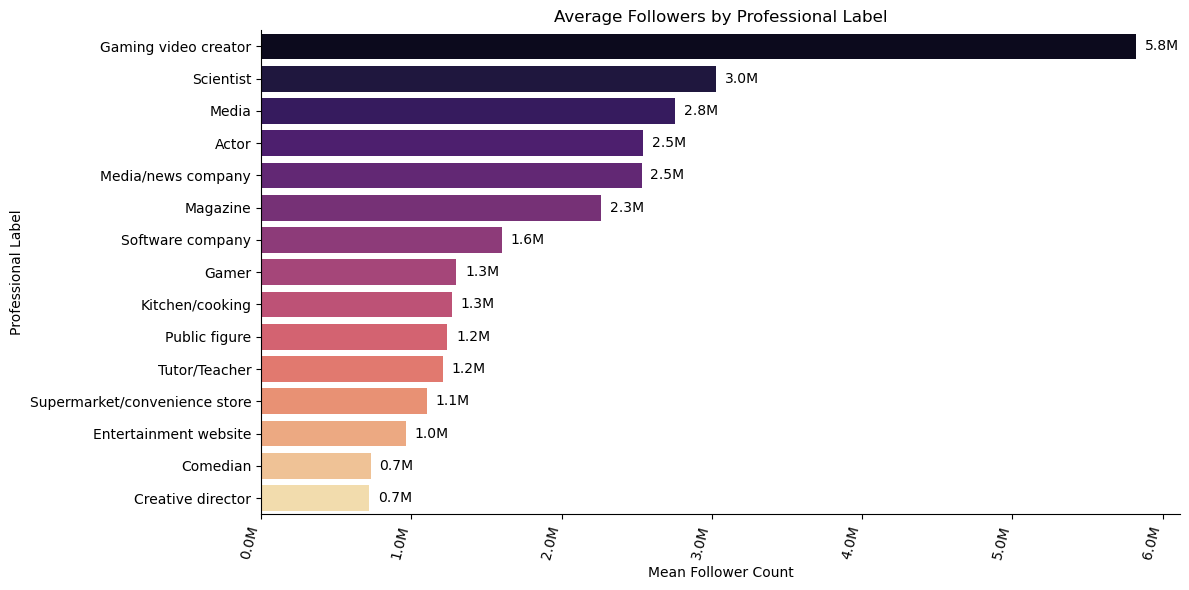

In [65]:
from matplotlib.ticker import FuncFormatter

label_grouped = label_grouped.sort_values(by='Mean_Follower_Count', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Mean_Follower_Count', y=label_grouped.index, data=label_grouped, palette="magma_r")


# Add labels and title
plt.xlabel('Mean Follower Count')
plt.ylabel('Professional Label')
plt.title('Average Followers by Professional Label')

plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Apply FuncFormatter to display x-axis ticks in millions
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=75, ha='right')

# Add text labels to each bar
for index, value in enumerate(label_grouped['Mean_Follower_Count']):
    plt.text(
        value + 0.01 * label_grouped['Mean_Follower_Count'].max(),  # "0.01" is not for adding but a bit to the right of the bar
        index,  # y-position
        f'{value / 1e6:.1f}M',  # formatted label
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )


# Show the plot
plt.tight_layout()
plt.show()

